In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Dataset
[Download DATASETS from here](https://github.com/utshabkg/LungCancer_Biomarker/tree/main/dataset)

In [105]:
plasma = pd.read_csv('G:\Research\SM Sir\LungCancer_Biomarker\plasma\metabolic tests\plasma(Specific Metabolics)_0.001.csv')
serum = pd.read_csv('G:\Research\SM Sir\LungCancer_Biomarker\serum\metabolic tests\serum(Specific Metabolics)_0.001.csv')
plasma = plasma.drop('Unnamed: 0', axis=1)
serum = serum.drop('Unnamed: 0', axis=1)
serum

,aspartic acid,hypoxanthine,inosine,phenol,taurine,Class
0,-0.41,0.01,-0.57,-0.12,0.01,disease
1,0.18,0.23,-0.28,0.45,0.86,disease
2,-0.14,0.13,-0.52,1.34,0.04,disease
3,0.28,0.25,-0.61,0.25,0.78,disease
4,-0.56,-0.26,-0.60,-1.47,-0.75,disease
...,...,...,...,...,...,...
77,-0.61,-0.75,0.23,-0.76,-1.02,control
78,0.18,5.62,4.86,0.09,-0.49,control
79,-0.68,-0.54,0.41,-0.47,-0.79,control
80,-0.42,0.01,-0.67,-1.72,-0.37,control


Keep labels as an numpy array.

In [106]:
labels = np.reshape(plasma.Class.to_numpy(), (82,1))
targets = plasma.iloc[:, -1].unique()

# PCA, tSNE & Other Functions
## PCA

In [107]:
from sklearn.decomposition import PCA
def pca_analysis(df, n_components):
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(df.iloc[:, :-1].values)

    pca_concatenate = np.concatenate([pca_result, labels], axis=1)

    return pca_concatenate

In [108]:
def make_dataframe(array, n_features):
    col = []
    for i in range(1, n_features+1):
        col.append(f'pc{i}')
    col.append('Class')
    return pd.DataFrame(array, columns = col)

In [109]:
def plotting(pca_df, n_components):
    fig, axes = plt.subplots(nrows=n_components-1, ncols=4, figsize=(20, 8))
    fig.suptitle("Principal Component Analysis",fontsize=20)

    for i in range(n_components):
        for j in range(i+1, n_components):
            if j==n_components:
                break
            axes[i, j-1].set_xlabel(f'PC{i+1}',fontsize=20)
            axes[i, j-1].set_ylabel(f'PC{j+1}',fontsize=20)
            for target, color in zip(targets,colors):
                indicesToKeep = pca_df.Class == target
                axes[i, j-1].scatter(pca_df.loc[indicesToKeep, f'pc{i+1}']
                                , pca_df.loc[indicesToKeep, f'pc{j+1}'], c = color, s = 50)
    fig.legend(targets,prop={'size': 15}, loc='upper right')

## t-SNE

In [110]:
from sklearn.manifold import TSNE
def tsne_analysis(df, n_components):
    tsne = TSNE(n_components=n_components)
    tsne_result = tsne.fit_transform(df.iloc[:, :-1].values)

    tsne_concatenate = np.concatenate([tsne_result, labels], axis=1)

    return tsne_concatenate

In [111]:
def tsne_dataframe(array, n_features):
    col = []
    for i in range(1, n_features+1):
        col.append(f'tsne{i}')
    col.append('Class')
    return pd.DataFrame(array, columns = col)

In [112]:
def tsne_plotting(tsne_df, n_components):
    fig, axes = plt.subplots(nrows=n_components-1, ncols=4, figsize=(20, 8))
    fig.suptitle("t-SNE",fontsize=20)

    for i in range(n_components):
        for j in range(i+1, n_components):
            if j==n_components:
                break
            axes[i, j-1].set_xlabel(f'TSNE{i+1}',fontsize=20)
            axes[i, j-1].set_ylabel(f'TSNE{j+1}',fontsize=20)
            for target, color in zip(targets,colors):
                indicesToKeep = tsne_df.Class == target
                axes[i, j-1].scatter(tsne_df.loc[indicesToKeep, f'tsne{i+1}']
                                , tsne_df.loc[indicesToKeep, f'tsne{j+1}'], c = color, s = 50)
    fig.legend(targets,prop={'size': 15}, loc='upper right')

# EDA
## Plasma

In [113]:
pca2_plasma = pca_analysis(plasma, 2)

pca2_plasma_df = make_dataframe(pca2_plasma, 2)
# print(pca2_plasma_df.head)

<Figure size 432x288 with 0 Axes>

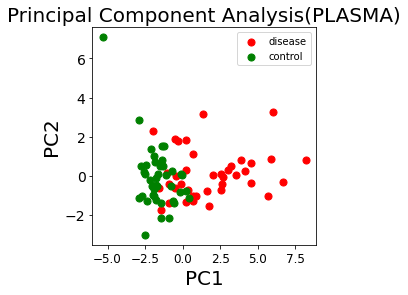

In [114]:
plt.figure()
plt.figure(figsize=(4, 4))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('PC1',fontsize=20)
plt.ylabel('PC2',fontsize=20)
plt.title("Principal Component Analysis(PLASMA)",fontsize=20)
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = pca2_plasma_df.Class == target
    plt.scatter(pca2_plasma_df.loc[indicesToKeep, 'pc1']
               , pca2_plasma_df.loc[indicesToKeep, 'pc2'], c = color, s = 50)

plt.legend(targets,prop={'size': 10})

In [115]:
pca3_plasma = pca_analysis(plasma, 3)

pca3_plasma_df = make_dataframe(pca3_plasma, 3)
# print(pca3_df.head)

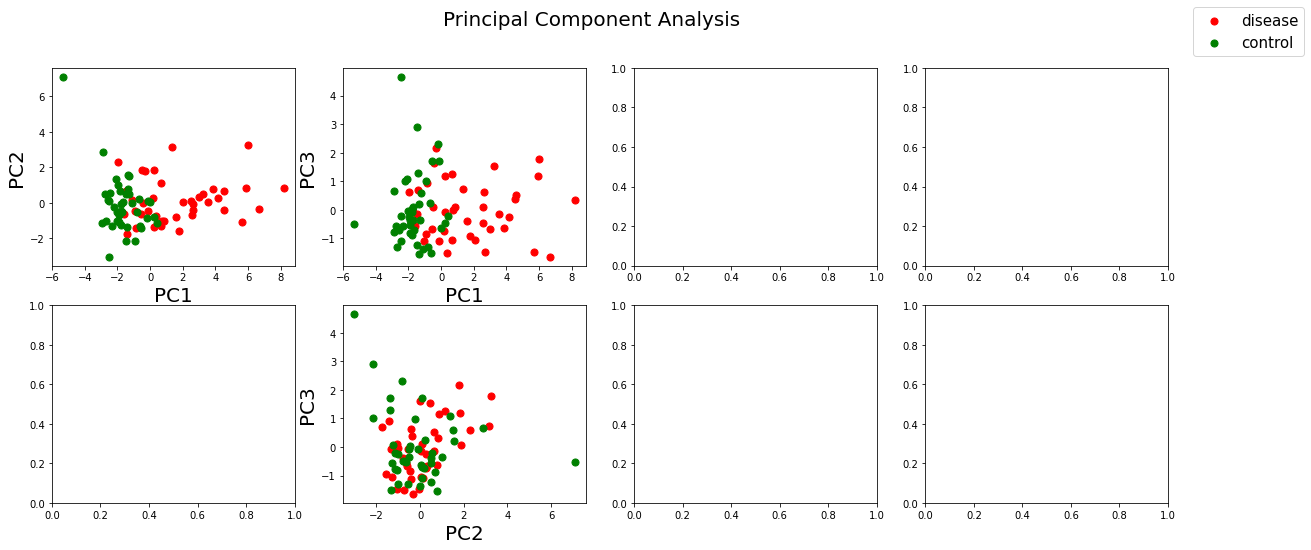

In [116]:
plotting(pca3_plasma_df, 3)

In [117]:
pca4_plasma = pca_analysis(plasma, 4)

pca4_plasma_df = make_dataframe(pca4_plasma, 4)
# print(pca4_plasma_df.head)

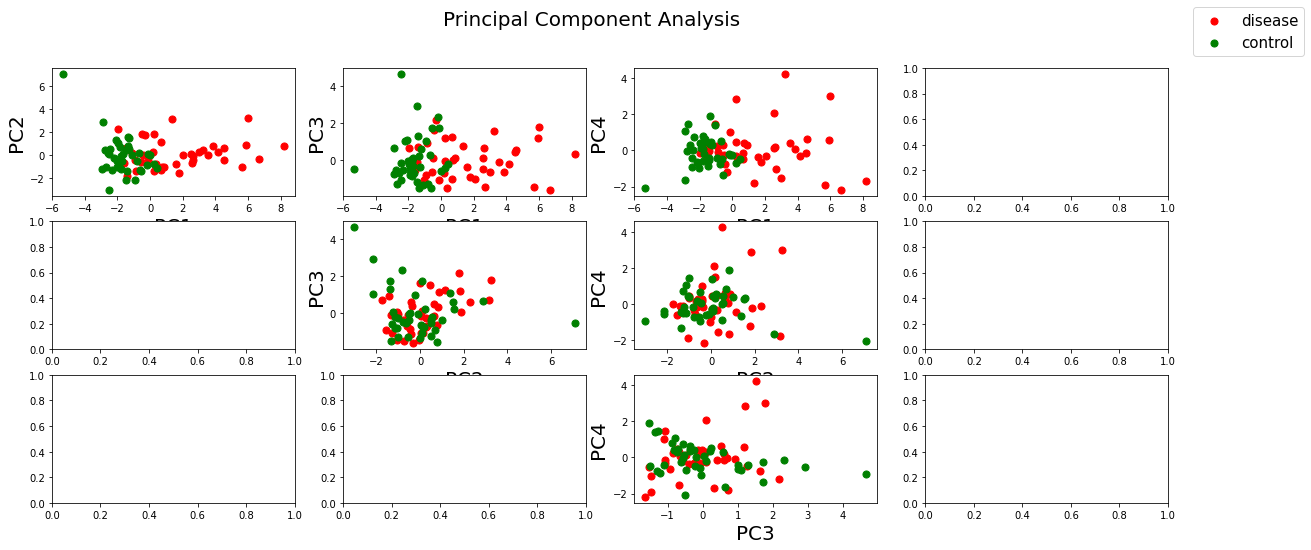

In [118]:
plotting(pca4_plasma_df, 4)

In [119]:
pca5_plasma = pca_analysis(plasma, 5)

pca5_plasma_df = make_dataframe(pca5_plasma, 5)
# print(pca5_df.head)

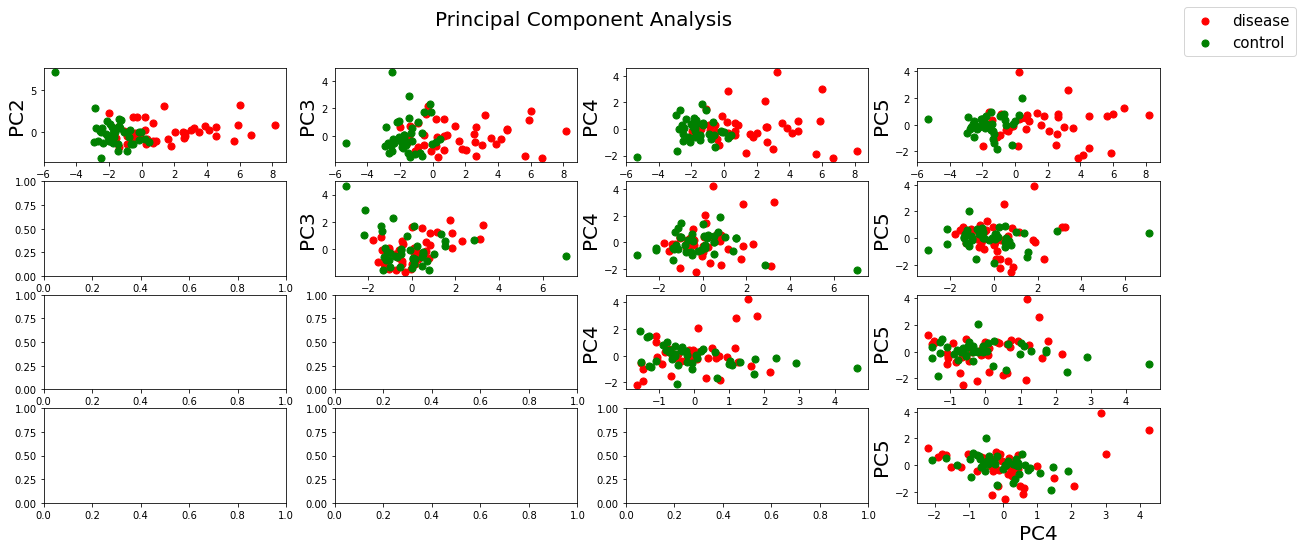

In [120]:
plotting(pca5_plasma_df, 5)

In [121]:
# now do PCA for 10, 15, 20
pca10_plasma = pca_analysis(plasma, 10)
pca10_plasma_df = make_dataframe(pca10_plasma, 10)

pca15_plasma = pca_analysis(plasma, 15)
pca15_plasma_df = make_dataframe(pca15_plasma, 15)
# print(pca20_plasma.head)

In [122]:
# pca15_plasma_df.to_csv("plasma/pca15_plasma_metabolics.csv")

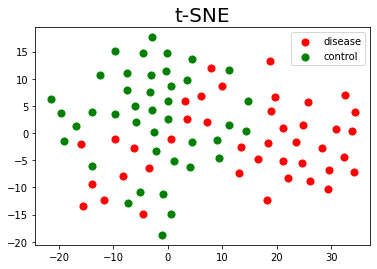

In [123]:
tsne2_plasma = tsne_analysis(plasma, 2)

tsne2_plasma_df = tsne_dataframe(tsne2_plasma, 2)
# print(tsne2_plasma_df.head)
# plotting(tsne2_plasma_df, 1, 1)
plt.title("t-SNE",fontsize=20)

for target, color in zip(targets,colors):
    indicesToKeep = tsne2_plasma_df.Class == target
    plt.scatter(tsne2_plasma_df.loc[indicesToKeep, 'tsne1']
               , tsne2_plasma_df.loc[indicesToKeep, 'tsne2'], c = color, s = 50)
plt.legend(targets,prop={'size': 10})

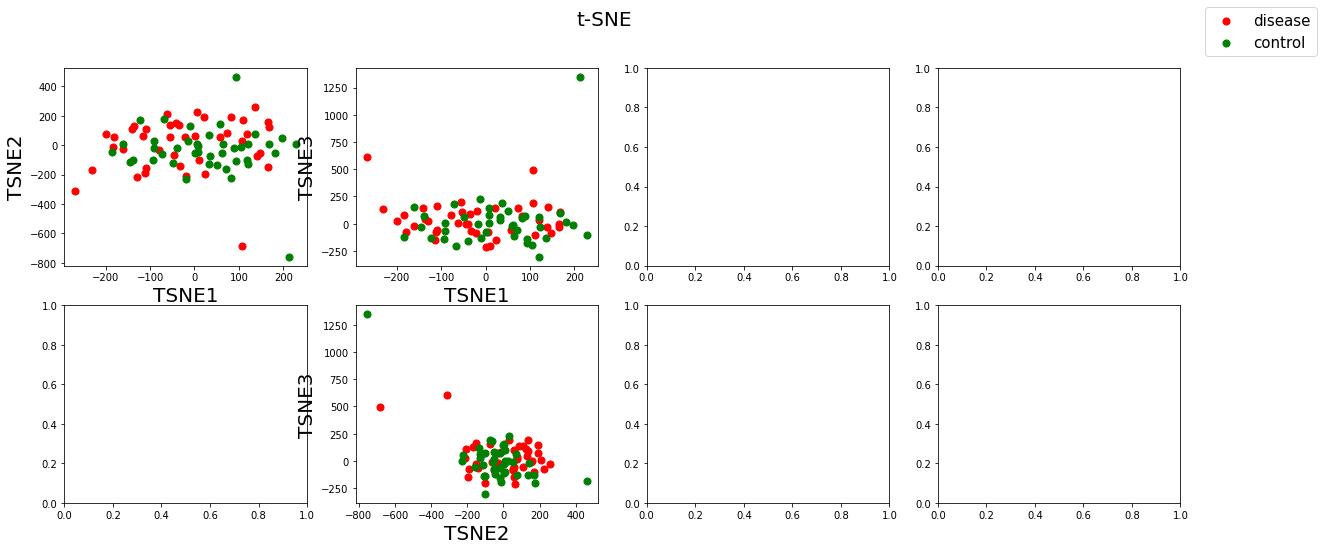

In [124]:
tsne3_plasma = tsne_analysis(plasma, 3)

tsne3_plasma_df = tsne_dataframe(tsne3_plasma, 3)
# print(tsne2_plasma_df.head)
tsne_plotting(tsne3_plasma_df, 3)


In [125]:
# tsne2_plasma_df.to_csv('plasma/tsne2_plasma_metabolics.csv')

## Serum

In [126]:
pca2_serum = pca_analysis(serum, 2)

pca2_serum_df = make_dataframe(pca2_serum, 2)
pca2_serum_df.head()

,pc1,pc2,Class
0,-0.15,-0.47,disease
1,0.90,-0.22,disease
2,0.72,-0.42,disease
3,0.91,-0.45,disease
4,-1.33,-0.50,disease


<Figure size 432x288 with 0 Axes>

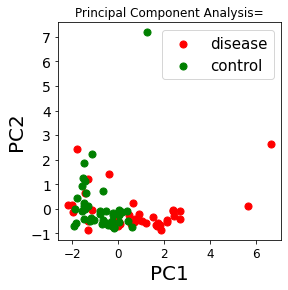

In [127]:
plt.figure()
plt.figure(figsize=(4, 4))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('PC1',fontsize=20)
plt.ylabel('PC2',fontsize=20)
plt.title("Principal Component Analysis=",fontsize=12)
targets = ['disease', 'control']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = pca2_serum_df.Class == target
    plt.scatter(pca2_serum_df.loc[indicesToKeep, 'pc1']
               , pca2_serum_df.loc[indicesToKeep, 'pc2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

In [128]:
pca3_serum = pca_analysis(serum, 3)

pca3_serum_df = make_dataframe(pca3_serum, 3)
# pca3_df.head()

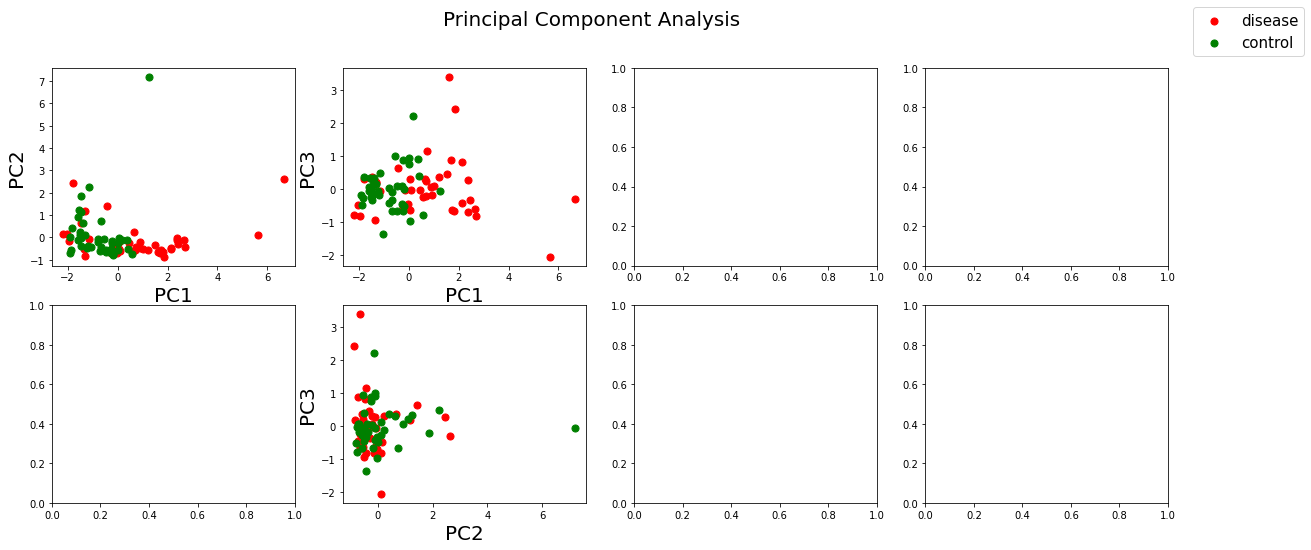

In [129]:
plotting(pca3_serum_df, 3)

In [130]:
pca4_serum = pca_analysis(serum, 4)

pca4_serum_df = make_dataframe(pca4_serum, 4)
# pca4_serum_df.head()

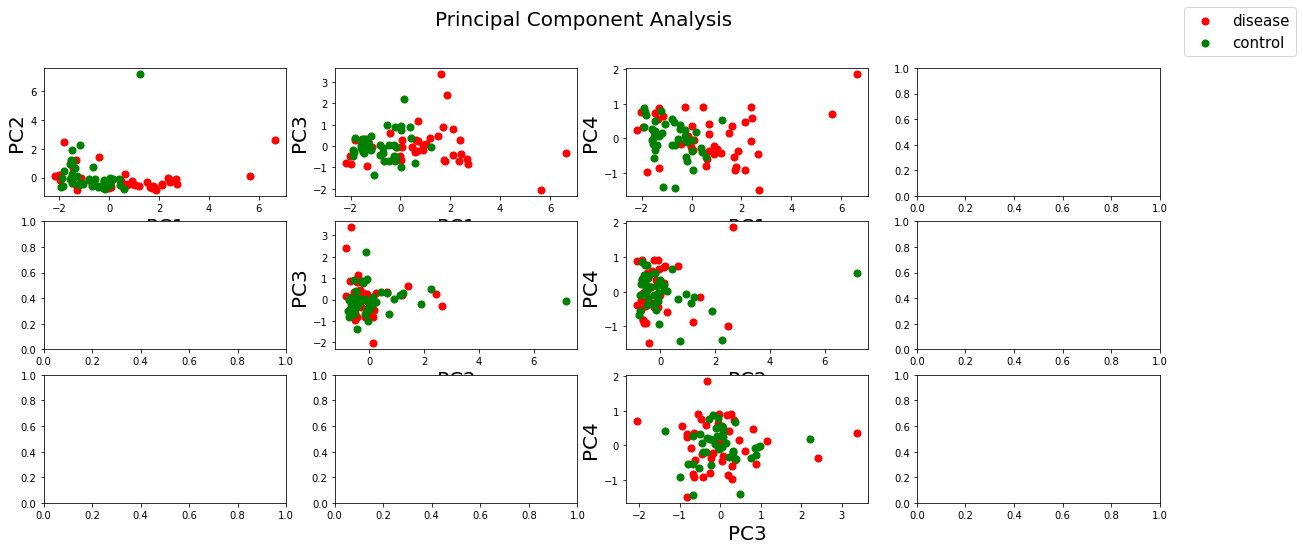

In [131]:
plotting(pca4_serum_df, 4)

In [132]:
pca5_serum = pca_analysis(serum, 5)

pca5_serum_df = make_dataframe(pca5_serum, 5)
# pca5_serum_df.head()

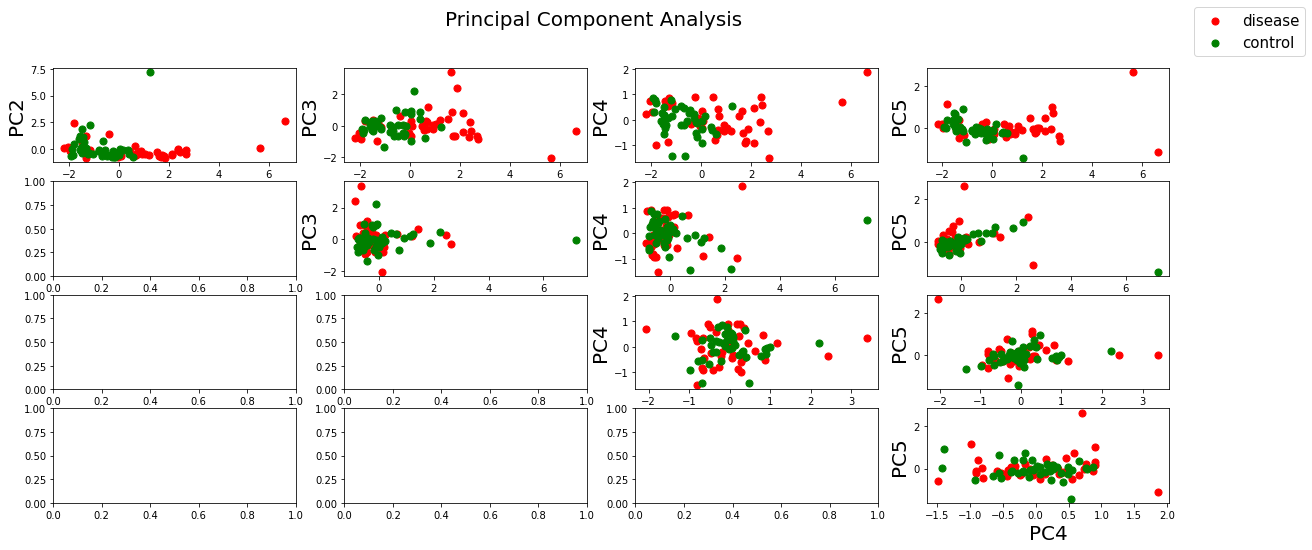

In [133]:
plotting(pca5_serum_df, 5)

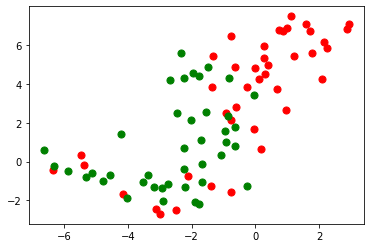

In [134]:
tsne2_serum = tsne_analysis(serum, 2)

tsne2_serum_df = tsne_dataframe(tsne2_serum, 2)
# print(tsne2_serum_df.head)
# plotting(tsne2_serum_df, 1, 1)

for target, color in zip(targets,colors):
    indicesToKeep = tsne2_serum_df.Class == target
    plt.scatter(tsne2_serum_df.loc[indicesToKeep, 'tsne1']
               , tsne2_serum_df.loc[indicesToKeep, 'tsne2'], c = color, s = 50)

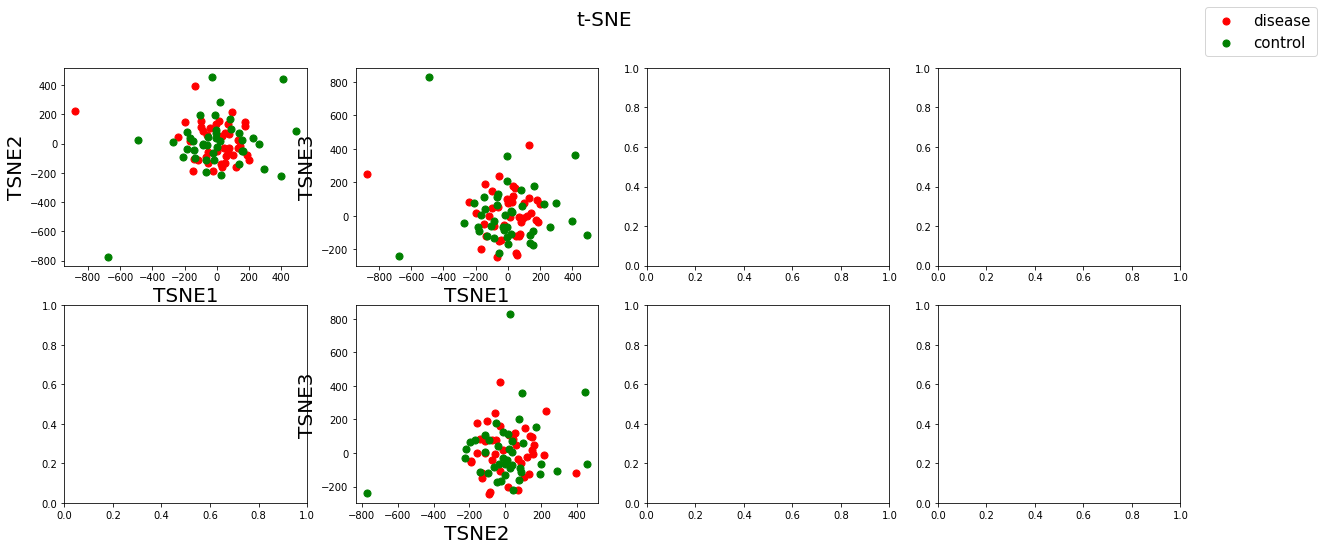

In [135]:
tsne3_serum = tsne_analysis(serum, 3)

tsne3_serum_df = tsne_dataframe(tsne3_serum, 3)
# print(tsne3_serum_df.head)
tsne_plotting(tsne3_serum_df, 3)


In [136]:
# tsne2_serum_df.to_csv('plasma/tsne2_serum_metabolics.csv')

# Models

In [137]:
# !pip install lazypredict

In [138]:
import lazypredict
from lazypredict.Supervised import LazyClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import classification_report

from sklearn.model_selection import ShuffleSplit, train_test_split, StratifiedKFold

In [139]:
def get_xy(df):
  X = df.drop('Class', axis=1)
  X = X.apply(pd.to_numeric)
  y = df['Class'].copy()
  y = y.map({"control": 0, "disease": 1})
  return X, y

In [140]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder

In [141]:
# # make the independent variables float type
# pca2_plasma_df['Class'].map({"control": 0, "disease": 1})
# plasma = pca2_plasma_df.apply(pd.to_numeric)
# plasma

In [142]:
accuracy = []
for k in [0, 2, 3, 4, 5, 10, 15, 22, 23]:
    if k==0:
        name = ['Plasma(Specific Metabolics)_0.001', 'Serum(Specific Metabolics)_0.001']
        dfs = [plasma, serum]
    elif k==22 or k==23:
        name = [f'tsne{k-20}_plasma(Specific Metabolics)_0.001', f'tsne{k-20}_serum(Specific Metabolics)_0.001']
        dfs = [vars()[f'tsne{k-20}_plasma_df'], vars()[f'tsne{k-20}_serum_df']]
    else:
        if k<=5:
            name = [f'pca{k}_plasma(Specific Metabolics)_0.001', f'pca{k}_serum(Specific Metabolics)_0.001']
            dfs = [vars()[f'pca{k}_plasma_df'], vars()[f'pca{k}_serum_df']]
        else:
            name = [f'pca{k}_plasma(Specific Metabolics)_0.001']
            dfs = [vars()[f'pca{k}_plasma_df']]
    
    random_state = 42

    for idx, data in enumerate(dfs):
      result = []
      X, y = get_xy(data)
      rs = ShuffleSplit(n_splits=10, test_size=.2, random_state=random_state)
      raw_x = X
      for train_index, test_index in rs.split(X):
        clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=matthews_corrcoef, predictions=True)
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    #     print(X_train, X_test, y_train, y_test)

        models, predictions = clf.fit(X_train, X_test, y_train, y_test)
        result.append(models)
    #     print(result)

      acc = []
      for i in range(10):
    #     print(result[i].iloc[0]['Balanced Accuracy'])
        acc.append(result[i].iloc[0]['Balanced Accuracy'])

      print(f'\n{name[idx]}: {sum(acc)/len(acc)}')
      accuracy.append([f'{name[idx]}', f'{sum(acc)/len(acc)}'])

  7%|▋         | 2/29 [00:00<00:01, 16.13it/s]


Plasma(Specific Metabolics)_0.001: 0.892890442890443


  7%|▋         | 2/29 [00:00<00:01, 16.13it/s]


Serum(Specific Metabolics)_0.001: 0.8521707459207459


  7%|▋         | 2/29 [00:00<00:01, 16.67it/s]


pca2_plasma(Specific Metabolics)_0.001: 0.8848096348096348


  7%|▋         | 2/29 [00:00<00:01, 17.70it/s]


pca2_serum(Specific Metabolics)_0.001: 0.8076631701631701


  3%|▎         | 1/29 [00:00<00:02, 10.00it/s]


pca3_plasma(Specific Metabolics)_0.001: 0.8806429681429682


  7%|▋         | 2/29 [00:00<00:01, 17.54it/s]


pca3_serum(Specific Metabolics)_0.001: 0.8056429681429682


  7%|▋         | 2/29 [00:00<00:01, 18.01it/s]


pca4_plasma(Specific Metabolics)_0.001: 0.8637237762237762


  3%|▎         | 1/29 [00:00<00:04,  6.85it/s]


pca4_serum(Specific Metabolics)_0.001: 0.8572892385392386


  7%|▋         | 2/29 [00:00<00:01, 18.35it/s]


pca5_plasma(Specific Metabolics)_0.001: 0.8636023698523699


  3%|▎         | 1/29 [00:00<00:02,  9.71it/s]


pca5_serum(Specific Metabolics)_0.001: 0.8466103341103342


  7%|▋         | 2/29 [00:00<00:01, 16.81it/s]


pca10_plasma(Specific Metabolics)_0.001: 0.8449057886557887


  7%|▋         | 2/29 [00:00<00:01, 16.95it/s]


pca15_plasma(Specific Metabolics)_0.001: 0.8678273115773116


  7%|▋         | 2/29 [00:00<00:01, 17.39it/s]


tsne2_plasma(Specific Metabolics)_0.001: 0.8009663947163947


  3%|▎         | 1/29 [00:00<00:04,  6.45it/s]


tsne2_serum(Specific Metabolics)_0.001: 0.8494512432012431


  7%|▋         | 2/29 [00:00<00:01, 18.18it/s]


tsne3_plasma(Specific Metabolics)_0.001: 0.7961684149184148


100%|██████████| 29/29 [00:00<00:00, 45.17it/s]


tsne3_serum(Specific Metabolics)_0.001: 0.7224358974358974


In [143]:
accuracy_df = pd.DataFrame(accuracy, columns=['Processed Dataset', 'Accuracy'])

In [150]:
accuracy_df.to_csv('G:/Research/SM Sir/LungCancer_Biomarker/accuracy/accuracy_Specific Metabolics2.csv', index=False)
accuracy_df

,Processed Dataset,Accuracy
0,Plasma(Specific Metabolics)_0.001,0.892890442890443
1,Serum(Specific Metabolics)_0.001,0.8521707459207459
2,pca2_plasma(Specific Metabolics)_0.001,0.8848096348096348
3,pca2_serum(Specific Metabolics)_0.001,0.8076631701631701
4,pca3_plasma(Specific Metabolics)_0.001,0.8806429681429682
5,pca3_serum(Specific Metabolics)_0.001,0.8056429681429682
6,pca4_plasma(Specific Metabolics)_0.001,0.8637237762237762
7,pca4_serum(Specific Metabolics)_0.001,0.8572892385392386
8,pca5_plasma(Specific Metabolics)_0.001,0.8636023698523699
9,pca5_serum(Specific Metabolics)_0.001,0.8466103341103342


In [ ]:
name = ['plasma']
dfs = [plasma]

random_state = 42

for idx, data in enumerate(dfs):
  result = []
  X, y = get_xy(data)
  rs = ShuffleSplit(n_splits=10, test_size=.2, random_state=random_state)
  raw_x = X
  for train_index, test_index in rs.split(X):
    clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=matthews_corrcoef, predictions=True)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
#     print(X_train, X_test, y_train, y_test)

    models, predictions = clf.fit(X_train, X_test, y_train, y_test)
    result.append(models)
#     print(result)

  acc = []
  for i in range(10):
#     print(result[i].iloc[0]['Balanced Accuracy'])
    acc.append(result[i].iloc[0]['Balanced Accuracy'])

In [ ]:
result